<a href="https://colab.research.google.com/github/aarsanjani/meansquares/blob/master/version2/modeling/prophet/TX_TimeSeriesAnalysis_Prophet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TX Prophet

## Imports

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from fbprophet.diagnostics import cross_validation
from fbprophet.diagnostics import performance_metrics

## Texas Data

In [3]:
TX_labeledData = pd.read_csv('/content/drive/Shared drives/CMPE 295- Master Project/projectdata-2021/TX_alldatasets_Jan11.csv',low_memory=False)
TX_labeledData.tail()

,Date,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
53458,2020-12-30,Texas,48507,10,Zavala County,11840,1,4.564,47,0.0,0.0,0.0,0.0,-38.0,0.0
53459,2020-12-31,Texas,48507,5,Zavala County,11840,1,3.274,34,0.0,0.0,0.0,0.0,-44.0,0.0
53460,2021-01-01,Texas,48507,0,Zavala County,11840,1,1.683,17,0.0,0.0,0.0,0.0,-61.0,0.0
53461,2021-01-04,Texas,48507,0,Zavala County,11840,1,10.211,106,0.0,0.0,0.0,0.0,-32.0,0.0
53462,2021-01-05,Texas,48507,98,Zavala County,11840,1,1.758,18,0.0,0.0,0.0,0.0,-31.0,0.0


In [4]:
TX_labeledData = TX_labeledData.dropna()

In [5]:
TX_labeledData['label_y'] = preprocessing.LabelEncoder().fit_transform(TX_labeledData['New cases'])

In [6]:
TX_labeledData['County Name Label'] = preprocessing.LabelEncoder().fit_transform(TX_labeledData['County Name'])

In [7]:
TX_labeledData.rename(columns={'Date': 'ds', 'label_y': 'y'}, inplace=True)

In [8]:
train, test = train_test_split(TX_labeledData, test_size=0.2, shuffle=False)

In [9]:
train.head()

,ds,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,y,County Name Label
0,2020-03-01,Texas,48001,0,Anderson County,57735,0,8.910,79,16.0,15.0,0.0,0.0,3.0,0.0,62,0
1,2020-03-02,Texas,48001,0,Anderson County,57735,0,10.708,95,14.0,7.0,0.0,0.0,2.0,-1.0,62,0
2,2020-03-03,Texas,48001,0,Anderson County,57735,0,12.118,107,21.0,8.0,0.0,0.0,2.0,-2.0,62,0
3,2020-03-04,Texas,48001,0,Anderson County,57735,0,9.156,81,12.0,5.0,0.0,0.0,1.0,2.0,62,0
4,2020-03-05,Texas,48001,0,Anderson County,57735,0,11.230,100,18.0,13.0,0.0,0.0,3.0,-3.0,62,0


In [10]:
test.tail()

,ds,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,y,County Name Label
53458,2020-12-30,Texas,48507,10,Zavala County,11840,1,4.564,47,0.0,0.0,0.0,0.0,-38.0,0.0,72,205
53459,2020-12-31,Texas,48507,5,Zavala County,11840,1,3.274,34,0.0,0.0,0.0,0.0,-44.0,0.0,67,205
53460,2021-01-01,Texas,48507,0,Zavala County,11840,1,1.683,17,0.0,0.0,0.0,0.0,-61.0,0.0,62,205
53461,2021-01-04,Texas,48507,0,Zavala County,11840,1,10.211,106,0.0,0.0,0.0,0.0,-32.0,0.0,62,205
53462,2021-01-05,Texas,48507,98,Zavala County,11840,1,1.758,18,0.0,0.0,0.0,0.0,-31.0,0.0,160,205


## Harris County

In [11]:
TX_labeledData_Harris = TX_labeledData[TX_labeledData['County Name'] == 'Harris County']
TX_labeledData_Harris = TX_labeledData_Harris.reset_index(drop=True)
TX_labeledData_Harris.tail()

,ds,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,y,County Name Label
295,2021-01-01,Texas,48201,1930,Harris County,4713325,1,3.197,35,-42.0,-32.0,-24.0,-58.0,-76.0,27.0,1027,81
296,2021-01-02,Texas,48201,3402,Harris County,4713325,1,4.527,50,-23.0,-15.0,-30.0,-32.0,-25.0,9.0,1075,81
297,2021-01-03,Texas,48201,2492,Harris County,4713325,1,3.457,38,-19.0,-17.0,-19.0,-27.0,-16.0,6.0,1058,81
298,2021-01-04,Texas,48201,1907,Harris County,4713325,1,4.742,52,-14.0,-9.0,-17.0,-33.0,-35.0,11.0,1024,81
299,2021-01-05,Texas,48201,2030,Harris County,4713325,1,4.616,51,-16.0,-6.0,-15.0,-34.0,-34.0,12.0,1035,81


In [12]:
TX_labeledData_Harris.head()

,ds,Province_State,FIPS,New cases,County Name,population,mask_rule_active,m50,m50_index,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,y,County Name Label
0,2020-03-01,Texas,48201,0,Harris County,4713325,0,6.316,70,10.0,5.0,-8.0,1.0,3.0,-1.0,62,81
1,2020-03-02,Texas,48201,0,Harris County,4713325,0,8.717,97,9.0,7.0,11.0,0.0,4.0,-2.0,62,81
2,2020-03-03,Texas,48201,0,Harris County,4713325,0,8.948,100,13.0,10.0,27.0,2.0,3.0,-2.0,62,81
3,2020-03-04,Texas,48201,0,Harris County,4713325,0,8.837,98,8.0,8.0,1.0,0.0,2.0,0.0,62,81
4,2020-03-05,Texas,48201,2,Harris County,4713325,0,9.644,107,10.0,9.0,31.0,3.0,3.0,-2.0,64,81


In [13]:
train_Harris, test_Harris = train_test_split(TX_labeledData_Harris, test_size=0.2, shuffle=False)

In [14]:
m = Prophet()

In [15]:
#m.add_regressor('County Name Label')
m.add_regressor('population')
m.add_regressor('mask_rule_active')
#m.add_regressor('m50')
m.add_regressor('m50_index')
m.add_regressor('retail_and_recreation_percent_change_from_baseline')
m.add_regressor('grocery_and_pharmacy_percent_change_from_baseline')
m.add_regressor('parks_percent_change_from_baseline')
m.add_regressor('transit_stations_percent_change_from_baseline')
m.add_regressor('workplaces_percent_change_from_baseline')
m.add_regressor('residential_percent_change_from_baseline')

In [16]:
m.fit(train_Harris)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [17]:
future = m.make_future_dataframe(periods=60)
future.tail()

,ds
295,2020-12-24
296,2020-12-25
297,2020-12-26
298,2020-12-27
299,2020-12-28


In [18]:
future.shape

(300, 1)

In [19]:
train_Harris.shape

(240, 17)

In [20]:
test_Harris.shape

(60, 17)

In [21]:
TX_labeledData_Harris.shape

(300, 17)

In [22]:
#future['County Name Label'] = TX_labeledData_Harris['County Name Label']
future['population'] = TX_labeledData_Harris['population']
future['mask_rule_active'] = TX_labeledData_Harris['mask_rule_active']
#future['m50'] = TX_labeledData_Harris['m50']
future['m50_index'] = TX_labeledData_Harris['m50_index']
future['retail_and_recreation_percent_change_from_baseline'] = TX_labeledData_Harris['retail_and_recreation_percent_change_from_baseline']
future['grocery_and_pharmacy_percent_change_from_baseline'] = TX_labeledData_Harris['grocery_and_pharmacy_percent_change_from_baseline']
future['parks_percent_change_from_baseline'] = TX_labeledData_Harris['parks_percent_change_from_baseline']
future['transit_stations_percent_change_from_baseline'] = TX_labeledData_Harris['transit_stations_percent_change_from_baseline']
future['workplaces_percent_change_from_baseline'] = TX_labeledData_Harris['workplaces_percent_change_from_baseline']
future['residential_percent_change_from_baseline'] = TX_labeledData_Harris['residential_percent_change_from_baseline']

In [23]:
forecast = m.predict(future)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,grocery_and_pharmacy_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline_lower,grocery_and_pharmacy_percent_change_from_baseline_upper,m50_index,m50_index_lower,m50_index_upper,mask_rule_active,mask_rule_active_lower,mask_rule_active_upper,parks_percent_change_from_baseline,parks_percent_change_from_baseline_lower,parks_percent_change_from_baseline_upper,population,population_lower,population_upper,residential_percent_change_from_baseline,residential_percent_change_from_baseline_lower,residential_percent_change_from_baseline_upper,retail_and_recreation_percent_change_from_baseline,retail_and_recreation_percent_change_from_baseline_lower,retail_and_recreation_percent_change_from_baseline_upper,transit_stations_percent_change_from_baseline,transit_stations_percent_change_from_baseline_lower,transit_stations_percent_change_from_baseline_upper,weekly,weekly_lower,weekly_upper,workplaces_percent_change_from_baseline,workplaces_percent_change_from_baseline_lower,workplaces_percent_change_from_baseline_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
295,2020-12-24,185.216085,209.081151,587.196850,131.528736,232.350016,217.715048,217.715048,217.715048,181.093824,181.093824,181.093824,30.593150,30.593150,30.593150,-2.418425,-2.418425,-2.418425,208.504223,208.504223,208.504223,37.610992,37.610992,37.610992,-76.843992,-76.843992,-76.843992,171.800370,171.800370,171.800370,77.161778,77.161778,77.161778,-150.286807,-150.286807,-150.286807,36.621223,36.621223,36.621223,-115.027464,-115.027464,-115.027464,0.0,0.0,0.0,402.931133
296,2020-12-25,181.257253,285.317687,653.436993,126.294666,229.674873,292.357509,292.357509,292.357509,263.435276,263.435276,263.435276,9.296434,9.296434,9.296434,-0.506627,-0.506627,-0.506627,208.504223,208.504223,208.504223,51.040159,51.040159,51.040159,-76.843992,-76.843992,-76.843992,-34.074137,-34.074137,-34.074137,9.104194,9.104194,9.104194,75.143404,75.143404,75.143404,28.922233,28.922233,28.922233,21.771619,21.771619,21.771619,0.0,0.0,0.0,473.614763
297,2020-12-26,177.298421,205.041967,567.152735,120.751219,226.790357,218.024371,218.024371,218.024371,258.643843,258.643843,258.643843,11.801930,11.801930,11.801930,-2.036065,-2.036065,-2.036065,208.504223,208.504223,208.504223,26.420020,26.420020,26.420020,-76.843992,-76.843992,-76.843992,-68.386555,-68.386555,-68.386555,-5.223718,-5.223718,-5.223718,118.495367,118.495367,118.495367,-40.619472,-40.619472,-40.619472,45.912633,45.912633,45.912633,0.0,0.0,0.0,395.322792
298,2020-12-27,173.339589,83.111310,474.181025,114.786664,224.427059,104.530786,104.530786,104.530786,182.220568,182.220568,182.220568,1.779946,1.779946,1.779946,-0.251720,-0.251720,-0.251720,208.504223,208.504223,208.504223,21.943631,21.943631,21.943631,-76.843992,-76.843992,-76.843992,-11.199192,-11.199192,-11.199192,-23.133609,-23.133609,-23.133609,66.473011,66.473011,66.473011,-77.689782,-77.689782,-77.689782,-5.051731,-5.051731,-5.051731,0.0,0.0,0.0,277.870375
299,2020-12-28,169.380757,178.987871,554.591221,109.846294,221.454667,189.556918,189.556918,189.556918,186.471853,186.471853,186.471853,-1.978298,-1.978298,-1.978298,-0.379173,-0.379173,-0.379173,208.504223,208.504223,208.504223,17.467242,17.467242,17.467242,-76.843992,-76.843992,-76.843992,0.238281,0.238281,0.238281,-15.969652,-15.969652,-15.969652,57.802618,57.802618,57.802618,3.085065,3.085065,3.085065,-2.369396,-2.369396,-2.369396,0.0,0.0,0.0,358.937675


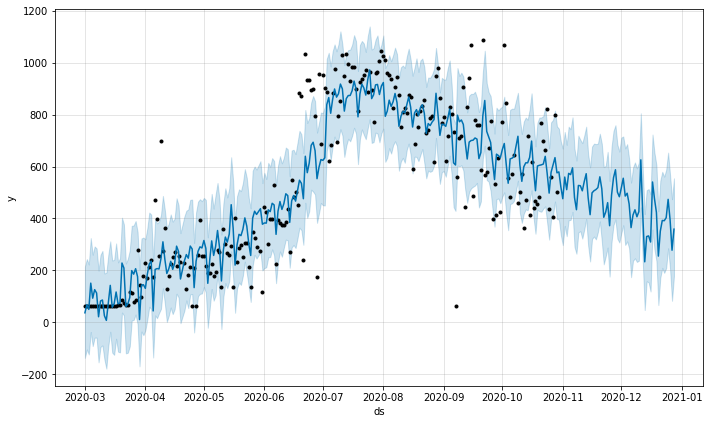

In [24]:
fig1 = m.plot(forecast)

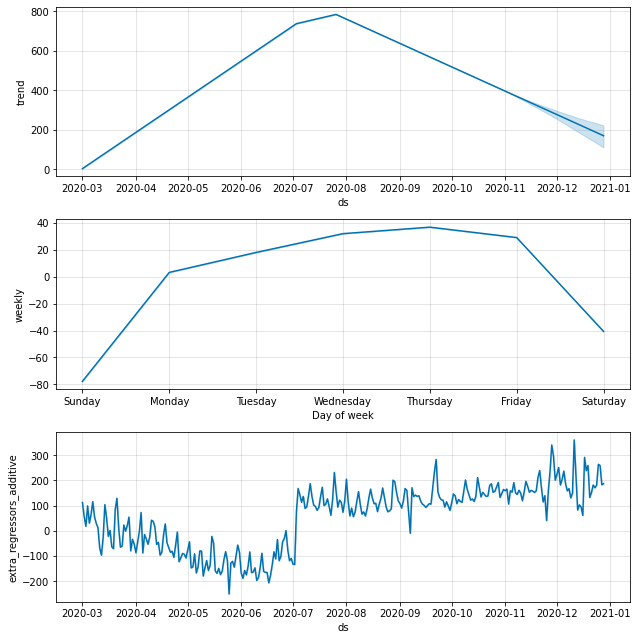

In [25]:
fig2 = m.plot_components(forecast)

In [26]:
plot_components_plotly(m, forecast)

In [27]:
plot_plotly(m, forecast)

In [28]:
cross_validation_results = cross_validation(m, period='15 days', horizon='59 days')
print(cross_validation_results)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2020-08-31 00:00:00 and 2020-08-31 00:00:00



           ds         yhat   yhat_lower   yhat_upper     y     cutoff
0  2020-09-01   934.347069   772.831889  1095.264695   790 2020-08-31
1  2020-09-02   921.479035   768.883319  1086.074164   620 2020-08-31
2  2020-09-03   972.804813   814.164377  1138.727043   716 2020-08-31
3  2020-09-04   990.232796   826.873326  1147.163436   828 2020-08-31
4  2020-09-05   901.073340   744.719648  1057.291757   803 2020-08-31
5  2020-09-06   747.421342   584.865056   900.796697   731 2020-08-31
6  2020-09-07   909.759902   762.679120  1071.790701    62 2020-08-31
7  2020-09-08  1048.878688   894.131098  1215.013288   558 2020-08-31
8  2020-09-09   985.806479   830.442834  1133.701887   708 2020-08-31
9  2020-09-10   984.869129   824.022740  1151.409677   717 2020-08-31
10 2020-09-11   922.314879   765.527763  1075.664972   904 2020-08-31
11 2020-09-12   847.248921   692.268429  1005.112826   446 2020-08-31
12 2020-09-13   812.509749   668.595655   970.173102   830 2020-08-31
13 2020-09-14   909

In [29]:
performance_metrics_results = performance_metrics(cross_validation_results)
print(performance_metrics_results)

   horizon            mse        rmse         mae      mape     mdape  coverage
0   5 days   42722.451393  206.694101  192.587411  0.269141  0.195933       0.6
1   6 days   38609.168214  196.492158  167.002265  0.237091  0.195933       0.6
2   7 days  164170.616690  405.179734  276.258439  2.874549  0.195933       0.6
3   8 days  199173.251548  446.288305  323.073214  2.978758  0.195933       0.6
4   9 days  209344.643463  457.541958  346.187950  3.018048  0.392382       0.4
5  10 days  221771.741562  470.926472  380.147108  3.068340  0.392382       0.2
6  11 days  221784.896422  470.940438  380.525815  3.067899  0.392382       0.2
7  12 days  110245.665658  332.032627  291.223619  0.513122  0.392382       0.2
8  13 days   62114.470173  249.227748  196.545932  0.341395  0.373597       0.4
9  14 days   46865.952812  216.485456  147.096438  0.269420  0.032510       0.6
10 15 days   37228.650921  192.947275  124.225941  0.223476  0.032510       0.8
11 16 days   72167.577936  268.640239  2